# Install libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# clone hifuku
parent_dir = '/content/drive/MyDrive' # install location
%cd $parent_dir
!git clone https://github.com/onnonuro/mmmetry.git

/content/drive/MyDrive
Cloning into 'hifuku'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 124 (delta 50), reused 99 (delta 32), pack-reused 0
Receiving objects: 100% (124/124), 21.03 MiB | 7.30 MiB/s, done.
Resolving deltas: 100% (50/50), done.
fatal: cannot exec '/content/drive/MyDrive/hifuku/.git/hooks/post-checkout': Permission denied
Encountered 2 file(s) that should have been pointers, but weren't:
	data/.DS_Store
	data/graphical_abstract.jpg


In [ ]:
# install required dependencies.
root = f'{parent_dir}/mmmetry'
%cd $root
!pip install -e .

/content/drive/MyDrive/hifuku
Obtaining file:///content/drive/MyDrive/hifuku
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.6 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=99507774ef1ca7143666deebc145c331e7e192a0f71793b1cd63d37559ec592d
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=2b78

In [1]:
# Importing necessary libraries and modules for data handling, visualization, and mathematical operations.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
from glob import glob
import time

import csv
import os.path
from pathlib import Path
import random
import math
import warnings
warnings.simplefilter('ignore')

import cv2
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 933120000
from PIL import Image, ImageDraw, ImageFont
# from xml.etree.ElementTree import parse

import joblib
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.spatial import distance
from scipy.stats import entropy
from sklearn.neighbors import KernelDensity

from tqdm import tqdm

# import torch
# import ultralytics
from ultralytics import YOLO

import networkx as nx
from community import community_louvain
import mmmetry

# Set a sample image for analysis

In [2]:
parent_dir = '/Users/M286333/Documents/_projects'
root = f'{parent_dir}/mmmetry'

wsi_path = f'{root}/data/sample_ALS_crop.jpeg'
scale = 0.2730  # Scale in µm/pixel for the WSI.

# Run Muscle Morphometry


0: 640x640 224 ms, 1: 640x640 201 ms, 2: 640x640 22 ms, 3: 640x640 230 ms, 4: 640x640 226 ms, 5: 640x640 20 ms, 6: 640x640 75 ms, 7: 640x640 80 ms, 8: 640x640 9 ms, 6659.7ms
Speed: 3.3ms preprocess, 740.0ms inference, 46.1ms postprocess per image at shape (1, 3, 640, 640)
100%|██████████| 470/470 [00:00<00:00, 917.78it/s]
468it [00:03, 131.83it/s]
468it [00:00, 611.73it/s] 
468it [00:01, 426.83it/s]
468it [00:00, 755.99it/s]
468it [00:01, 377.39it/s]


sample_ALS_crop
Number of clusters: 17
Average number of nodes per cluster: 25.71
Average number of edges per node: 5.18
Prediction by LightGBM model
  Normal biopsy: 0.000±0.000%
  Myopathy: 29.586±36.105%
  Neuropathy: 70.414±36.105%
The analysis took 25 seconds.


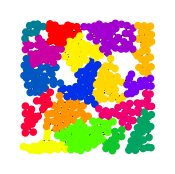

In [3]:
# Execute Hifuku
start_time = time.time()
result = mmmetry.main(root, wsi_path, scale=scale)
end_time = time.time()

# Calculate the total time taken
elapsed_time = int(end_time - start_time)
print(f"The analysis took {elapsed_time} seconds.")

In [11]:
# Uncomment to unassign resources in Google Colab when finished.
# from google.colab import runtime
# runtime.unassign()